<a href="https://colab.research.google.com/github/Worachet-Ch/project2022/blob/main/random_forest_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import os
from google.colab import drive #เชื่อม Google drive
drive.mount('/content/drive')
path = '/content/drive/My Drive/project' #เข้า drive
data1 = pd.read_csv(os.path.join(path,'df_1.csv'))

Mounted at /content/drive


In [3]:
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data1.drop('Unnamed: 0',1,inplace = True)
data1

<ipython-input-4-f170cadba2e7>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data1.drop('Unnamed: 0',1,inplace = True)


,Sex,AgeSYear,Weight,Height,BMI,Systolic,Diastolic,HeartRate,SMM,Fat Mass,...,Uric Acid,Cholesterol,Triglyceride,HDL-C,LDL,AST,ALT,Alkaline Phos,HbA1c,telomere length (kb)
0,2.0,58.0,47.200000,156.000000,19.40,112.000,64.00,70.00,19.741,13.631,...,4.8,180.0,97.0,62.0,98.0,25.0,32.0,40.0,5.800000,7.30
1,2.0,57.0,47.400000,153.000000,20.20,114.000,75.00,69.00,19.300,12.500,...,5.0,176.0,51.0,72.0,94.0,16.0,16.0,62.0,5.100000,6.36
2,2.0,24.0,53.200000,157.000000,21.60,103.000,69.00,78.00,21.300,14.600,...,5.2,159.0,45.0,52.0,98.0,13.0,17.0,50.0,5.400000,9.71
3,2.0,62.0,54.400000,165.000000,20.00,95.000,75.00,83.00,21.600,15.200,...,4.1,230.0,94.0,61.0,151.0,18.0,31.0,76.0,5.600000,6.17
4,2.0,86.0,49.000000,154.000000,20.70,129.000,79.00,83.00,19.907,15.369,...,5.4,183.0,86.0,39.0,127.0,12.0,22.0,82.0,6.200000,4.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417,2.0,25.0,47.000000,165.000000,17.30,104.000,63.00,89.00,20.387,12.852,...,4.8,232.0,36.0,96.0,128.0,18.0,12.0,46.0,5.393333,8.98
418,2.0,31.0,72.200000,168.000000,25.60,123.000,89.00,69.00,25.451,18.258,...,6.1,187.0,49.0,51.0,127.0,21.0,24.0,71.0,5.186667,8.23
419,2.0,32.0,54.500000,158.466667,21.68,113.160,71.83,72.30,22.707,21.599,...,5.1,222.0,58.0,79.0,132.0,17.0,10.0,34.0,5.486667,8.79
420,1.0,29.0,63.073333,168.866667,22.04,108.465,71.96,83.95,27.607,20.258,...,6.8,140.0,92.0,48.0,73.0,31.0,75.0,69.0,4.973333,8.93


# hyperparameter 

In [5]:
from sklearn.model_selection import GridSearchCV

In [6]:
def hyperparameter(data):
  y = data['telomere length (kb)']
  X = data.drop('telomere length (kb)',1)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=216)
  param_grid = {
    'bootstrap': [True, False ],
    'max_depth': [10,20,40,50],
    'max_features': [1,2, 3,5],
    'min_samples_leaf': [1,3, 4, 5],
    'min_samples_split': [6,8, 10, 12],
    'n_estimators': [100, 300,500,700, 1000],'random_state':[216]
  }
  rf = RandomForestRegressor()
  grid_search = GridSearchCV(estimator=rf,
                            param_grid=param_grid)
  grid_search.fit(X_train, y_train)
  return grid_search.best_params_

# First Data

In [7]:
scaler = MinMaxScaler()
Scaler = scaler.fit_transform(data1)

In [8]:
df = pd.DataFrame(  Scaler, columns = ['Sex' , 'AgeSYear', 'telomere length (kb)','Weight','Height','BMI','Systolic','Diastolic','HeartRate','SMM','Fat Mass',
                                       '% Body fat','waist to hip radio','abdominal circumference','visceral fat area','Glucose','BUN','Creatinine','Uric Acid','Cholesterol',
                                       'Triglyceride','HDL-C','LDL','AST','ALT','Alkaline Phos','HbA1c'])

In [9]:
df

,Sex,AgeSYear,telomere length (kb),Weight,Height,BMI,Systolic,Diastolic,HeartRate,SMM,...,Creatinine,Uric Acid,Cholesterol,Triglyceride,HDL-C,LDL,AST,ALT,Alkaline Phos,HbA1c
0,1.0,0.582090,0.154562,0.250000,0.198473,0.531707,0.333333,0.306452,0.101103,0.236189,...,0.424242,0.438849,0.211082,0.402299,0.350365,0.271186,0.376812,0.203390,0.540984,0.119472
1,1.0,0.567164,0.158287,0.181818,0.259542,0.551220,0.537037,0.290323,0.085409,0.208738,...,0.454545,0.410072,0.089710,0.517241,0.321168,0.118644,0.144928,0.389831,0.426230,0.083010
2,1.0,0.074627,0.266294,0.272727,0.366412,0.443902,0.425926,0.435484,0.156584,0.259709,...,0.484848,0.287770,0.073879,0.287356,0.350365,0.067797,0.159420,0.288136,0.475410,0.212956
3,1.0,0.641791,0.288641,0.454545,0.244275,0.365854,0.537037,0.516129,0.167260,0.274272,...,0.318182,0.798561,0.203166,0.390805,0.737226,0.152542,0.362319,0.508475,0.508197,0.075640
4,1.0,1.000000,0.188082,0.204545,0.297710,0.697561,0.611111,0.516129,0.107011,0.278374,...,0.515152,0.460432,0.182058,0.137931,0.562044,0.050847,0.231884,0.559322,0.606557,0.012801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417,1.0,0.089552,0.150838,0.454545,0.038168,0.453659,0.314815,0.612903,0.124093,0.217282,...,0.424242,0.812950,0.050132,0.793103,0.569343,0.152542,0.086957,0.254237,0.474317,0.184639
418,1.0,0.179104,0.620112,0.522727,0.671756,0.639024,0.796296,0.290323,0.304306,0.348495,...,0.621212,0.489209,0.084433,0.275862,0.562044,0.203390,0.260870,0.466102,0.440437,0.155547
419,1.0,0.194030,0.290503,0.306061,0.372519,0.543024,0.478333,0.343548,0.206655,0.429587,...,0.469697,0.741007,0.108179,0.597701,0.598540,0.135593,0.057971,0.152542,0.489617,0.177269
420,0.0,0.149254,0.450155,0.542424,0.400000,0.497220,0.480741,0.531452,0.381032,0.397039,...,0.727273,0.151079,0.197889,0.241379,0.167883,0.372881,1.000000,0.449153,0.405464,0.182700


In [10]:
y = df['telomere length (kb)']
X = df.drop('telomere length (kb)',1)

<ipython-input-10-2081a7e829a9>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = df.drop('telomere length (kb)',1)


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

In [12]:
from sklearn.ensemble import RandomForestRegressor
rg = RandomForestRegressor(n_estimators=100,random_state=99)
rg.fit(X_train, y_train)

RandomForestRegressor(random_state=99)

In [13]:
y_pred = rg.predict(X_test)
y_pred

array([0.66800745, 0.16163873, 0.40870143, 0.58162011, 0.4473234 ,
       0.4012216 , 0.20577281, 0.20117318, 0.5074612 , 0.6877095 ,
       0.52078212, 0.46735568, 0.19191806, 0.18383613, 0.35005587,
       0.17884544, 0.53295469, 0.27454376, 0.27364991, 0.83199255,
       0.28072626, 0.51538175, 0.19752328, 0.28204097, 0.06674115,
       0.06823091, 0.32469274, 0.69774674, 0.07050279, 0.51553197,
       0.21736313, 0.2781378 , 0.20418994, 0.32858473, 0.83091248,
       0.26653631, 0.79804469, 0.21126629, 0.2339851 , 0.38337927,
       0.15284916, 0.63389199, 0.37048417, 0.75882682, 0.3146406 ,
       0.15698324, 0.35921291, 0.14528864, 0.14729981, 0.07379888,
       0.38881316, 0.59662942, 0.29316574, 0.27247672, 0.28420112,
       0.33665549, 0.6081378 , 0.36498448, 0.31913594, 0.15357542,
       0.37261577, 0.79869646, 0.38808939, 0.32908752, 0.2584432 ,
       0.17515829, 0.37300435, 0.43878709, 0.60947858, 0.49931099,
       0.62608939, 0.19204842, 0.56206331, 0.27945251, 0.65081

In [14]:
from sklearn import metrics
#Train
print('R2 Value Train:',metrics.r2_score(y_train, rg.predict(X_train)))
print('MSE Train:',metrics.mean_squared_error(y_train, rg.predict(X_train)))
print('MAE Train:',metrics.mean_absolute_error(y_train, rg.predict(X_train)))

R2 Value Train: 0.9932926163688213
MSE Train: 0.0002131004108298414
MAE Train: 0.009586271681890298


In [15]:
import numpy as np
print('MAPE : ',100- (np.mean(np.abs((y_test - y_pred) / y_test)) * 100))

MAPE :  74.87834292467195


In [16]:
#Test
print('R2 Value Test:',metrics.r2_score(y_test, y_pred))
print('MSE Test:',metrics.mean_squared_error(y_test, y_pred))
print('MAE Test:',metrics.mean_absolute_error(y_test, y_pred))

R2 Value Test: 0.9483930506289591
MSE Test: 0.002297787597567275
MAE Test: 0.03052895169240884


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


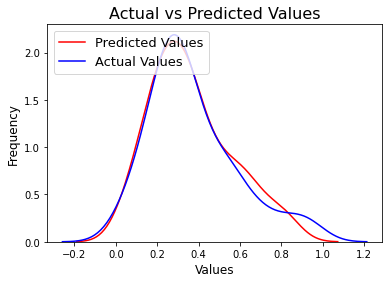

In [17]:
sns.distplot(y_pred, hist = False, color = 'r', label = 'Predicted Values')
sns.distplot(y_test, hist = False, color = 'b', label = 'Actual Values')
plt.title('Actual vs Predicted Values', fontsize = 16)
plt.xlabel('Values', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.legend(loc = 'upper left', fontsize = 13)

## hyper

In [ ]:
hyperparameter(df)

<ipython-input-16-e2bf7b4127fa>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = data.drop('telomere length (kb)',1)


{'bootstrap': False,
 'max_depth': 10,
 'max_features': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 300,
 'random_state': 216}

In [ ]:
rg = RandomForestRegressor(n_estimators=300,max_features=5,bootstrap= False,random_state=99,
                           max_depth=10,min_samples_leaf=1,min_samples_split=6)
rg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=False, max_depth=10, max_features=5,
                      min_samples_split=6, n_estimators=300, random_state=99)

In [ ]:
y_pred = rg.predict(X_test)
y_pred

array([0.6602558 , 0.18839402, 0.40354799, 0.56661136, 0.46410731,
       0.42586875, 0.19555842, 0.20489613, 0.52895992, 0.66228721,
       0.53166678, 0.50028827, 0.18664122, 0.18652165, 0.34879228,
       0.16341234, 0.49827438, 0.27782254, 0.28743455, 0.80158575,
       0.28037515, 0.52099717, 0.20410165, 0.28944606, 0.10984295,
       0.1092999 , 0.34118597, 0.71257696, 0.12568505, 0.47148367,
       0.22416426, 0.28153819, 0.20642543, 0.30679249, 0.80204255,
       0.26414341, 0.74499352, 0.21758401, 0.26328012, 0.37304169,
       0.15883645, 0.64465688, 0.38413152, 0.73488373, 0.31677905,
       0.15723788, 0.33452843, 0.16064284, 0.15017876, 0.13527117,
       0.3847114 , 0.57167505, 0.29495941, 0.24521177, 0.26883596,
       0.34020051, 0.58348781, 0.37045994, 0.32716134, 0.15938513,
       0.39510752, 0.73534831, 0.36739468, 0.33424583, 0.27210356,
       0.21929648, 0.36154221, 0.46128335, 0.56834259, 0.50713863,
       0.56061569, 0.21640957, 0.55501295, 0.27145124, 0.63792

In [ ]:
#Train
print('R2 Value Train:',metrics.r2_score(y_train, rg.predict(X_train)))
print('MSE Train:',metrics.mean_squared_error(y_train, rg.predict(X_train)))
print('MAE Train:',metrics.mean_absolute_error(y_train, rg.predict(X_train)))

R2 Value Train: 0.9978668503170616
MSE Train: 6.777233848421407e-05
MAE Train: 0.005462117079388848


In [ ]:
import numpy as np
print('MAPE : ',100- (np.mean(np.abs((y_test - y_pred) / y_test)) * 100))

MAPE :  60.35803329941537


In [ ]:
#Test
print('R2 Value Test:',metrics.r2_score(y_test, y_pred))
print('MSE Test:',metrics.mean_squared_error(y_test, y_pred))
print('MAE Test:',metrics.mean_absolute_error(y_test, y_pred))

R2 Value Test: 0.93929304459373
MSE Test: 0.002702963281469844
MAE Test: 0.03402961717901107


# Second Data

In [ ]:
data2 = pd.read_csv(os.path.join(path,'df_2.csv'))
data2.drop('Unnamed: 0',1,inplace = True)

<ipython-input-20-9295e0cecbd9>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data2.drop('Unnamed: 0',1,inplace = True)


In [ ]:
data2

,Sex,AgeSYear,Weight,Height,BMI,Systolic,Diastolic,HeartRate,SMM,Fat Mass,...,Uric Acid,Cholesterol,Triglyceride,HDL-C,LDL,AST,ALT,Alkaline Phos,HbA1c,telomere length (kb)
0,2.0,58.0,47.200,156.00,19.40,112.000,64.00,70.00,19.694,13.404,...,4.8,180.0,97.0,62.0,98.0,25.0,32.0,40.0,5.800,7.30
1,2.0,57.0,47.400,153.00,20.20,114.000,75.00,69.00,19.300,12.500,...,5.0,176.0,51.0,72.0,94.0,16.0,16.0,62.0,5.100,6.36
2,2.0,24.0,53.200,157.00,21.60,103.000,69.00,78.00,21.300,14.600,...,5.2,159.0,45.0,52.0,98.0,13.0,17.0,50.0,5.400,9.71
3,2.0,62.0,54.400,165.00,20.00,95.000,75.00,83.00,21.600,15.200,...,4.1,230.0,94.0,61.0,151.0,18.0,31.0,76.0,5.600,6.17
4,2.0,86.0,49.000,154.00,20.70,129.000,79.00,83.00,20.057,16.295,...,5.4,183.0,86.0,39.0,127.0,12.0,22.0,82.0,6.200,4.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417,2.0,25.0,47.000,165.00,17.30,104.000,63.00,89.00,20.299,13.578,...,4.8,232.0,36.0,96.0,128.0,18.0,12.0,46.0,5.316,8.98
418,2.0,31.0,72.200,168.00,25.60,123.000,89.00,69.00,25.286,18.181,...,6.1,187.0,49.0,51.0,127.0,21.0,24.0,71.0,5.215,8.23
419,2.0,32.0,65.656,156.96,25.98,115.860,73.17,74.72,23.573,24.765,...,5.1,222.0,58.0,79.0,132.0,17.0,10.0,34.0,5.542,8.79
420,1.0,29.0,67.768,169.90,23.87,117.205,75.50,85.37,29.753,16.638,...,6.8,140.0,92.0,48.0,73.0,31.0,75.0,69.0,5.725,8.93


In [ ]:
scaler = MinMaxScaler()
Scaler = scaler.fit_transform(data2)

In [ ]:
df2 = pd.DataFrame(  Scaler, columns = ['Sex' , 'AgeSYear', 'telomere length (kb)','Weight','Height','BMI','Systolic','Diastolic','HeartRate','SMM','Fat Mass',
                                       '% Body fat','waist to hip radio','abdominal circumference','visceral fat area','Glucose','BUN','Creatinine','Uric Acid','Cholesterol',
                                       'Triglyceride','HDL-C','LDL','AST','ALT','Alkaline Phos','HbA1c'])

In [ ]:
y = df2['telomere length (kb)']
X = df2.drop('telomere length (kb)',1)

<ipython-input-24-7d77ef194ec6>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = df2.drop('telomere length (kb)',1)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)
rg2 = RandomForestRegressor(n_estimators=100,random_state=99)
rg2.fit(X_train, y_train)

RandomForestRegressor(random_state=99)

In [ ]:
y_pred = rg2.predict(X_test)
y_pred

array([0.67309125, 0.1775419 , 0.41778417, 0.5586473 , 0.4494568 ,
       0.43056555, 0.21054618, 0.20044693, 0.51186965, 0.6596648 ,
       0.52868529, 0.46759832, 0.18171322, 0.19912477, 0.35501583,
       0.18180633, 0.54811769, 0.27800745, 0.27577281, 0.82100559,
       0.28022346, 0.50906574, 0.20891993, 0.30741136, 0.11191806,
       0.07074488, 0.35735214, 0.68032924, 0.08994413, 0.44675978,
       0.23042831, 0.28253259, 0.20635009, 0.3117689 , 0.82746741,
       0.27230912, 0.77655493, 0.20422719, 0.23951583, 0.40417784,
       0.13903166, 0.64573557, 0.40253408, 0.7555121 , 0.33484171,
       0.15664804, 0.34321341, 0.14798883, 0.14182495, 0.08512104,
       0.56034227, 0.56845661, 0.29331471, 0.2862257 , 0.2807635 ,
       0.35510149, 0.58737877, 0.38754022, 0.3264432 , 0.14128492,
       0.39827765, 0.82013035, 0.35859534, 0.33368715, 0.24124767,
       0.18480447, 0.37243203, 0.43186685, 0.57839851, 0.51547169,
       0.60538175, 0.18394786, 0.49743687, 0.28106741, 0.64884

In [ ]:
#Train
print('R2 Value Train:',metrics.r2_score(y_train, rg2.predict(X_train)))
print('MSE Train:',metrics.mean_squared_error(y_train, rg2.predict(X_train)))
print('MAE Train:',metrics.mean_absolute_error(y_train, rg2.predict(X_train)))

R2 Value Train: 0.9936340181673807
MSE Train: 0.00020289119423686546
MAE Train: 0.009567077786803322


In [ ]:
import numpy as np
print('MAPE : ',100- (np.mean(np.abs((y_test - y_pred) / y_test)) * 100))

MAPE :  68.28195486586704


In [ ]:
#Test
print('R2 Value Test:',metrics.r2_score(y_test, y_pred))
print('MSE Test:',metrics.mean_squared_error(y_test, y_pred))
print('MAE Test:',metrics.mean_absolute_error(y_test, y_pred))

R2 Value Test: 0.9481918611502428
MSE Test: 0.0023240642596175356
MAE Test: 0.03127911490853327


### hyper

In [ ]:
hyperparameter(df2)

<ipython-input-16-e2bf7b4127fa>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = data.drop('telomere length (kb)',1)


{'bootstrap': False,
 'max_depth': 10,
 'max_features': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 300,
 'random_state': 216}

In [ ]:
rg2 = RandomForestRegressor(n_estimators=300,max_features=5,bootstrap= False,random_state=99,
                           max_depth=10,min_samples_leaf=1,min_samples_split=6)
rg2.fit(X_train, y_train)

RandomForestRegressor(bootstrap=False, max_depth=10, max_features=5,
                      min_samples_split=6, n_estimators=300, random_state=99)

In [ ]:
y_pred = rg2.predict(X_test)
y_pred

array([0.64573322, 0.20030929, 0.41143759, 0.55086169, 0.45456178,
       0.44550056, 0.19535041, 0.20109207, 0.5363183 , 0.65318629,
       0.53979213, 0.49903769, 0.18284674, 0.19009161, 0.35626249,
       0.17313333, 0.52989741, 0.28562196, 0.27754468, 0.79406576,
       0.27942857, 0.51697571, 0.20926617, 0.28802687, 0.11616287,
       0.10702766, 0.36201733, 0.69629705, 0.1481207 , 0.44951928,
       0.22867149, 0.28395149, 0.20581353, 0.31814845, 0.79808964,
       0.27008537, 0.76588702, 0.23304828, 0.26757597, 0.38601324,
       0.14179993, 0.63895448, 0.39099102, 0.73092624, 0.33516822,
       0.15708112, 0.3371539 , 0.1502084 , 0.15003964, 0.18499319,
       0.51317803, 0.56467865, 0.30197591, 0.25711307, 0.27197059,
       0.34014795, 0.56152881, 0.38342567, 0.32787683, 0.13827287,
       0.4022721 , 0.75279982, 0.36095723, 0.34828051, 0.26303367,
       0.23316803, 0.36035923, 0.45785393, 0.56853193, 0.47854336,
       0.55365167, 0.22425646, 0.54439311, 0.25602847, 0.61394

In [ ]:
#Train
print('R2 Value Train:',metrics.r2_score(y_train, rg2.predict(X_train)))
print('MSE Train:',metrics.mean_squared_error(y_train, rg2.predict(X_train)))
print('MAE Train:',metrics.mean_absolute_error(y_train, rg2.predict(X_train)))

R2 Value Train: 0.9980156455951525
MSE Train: 6.324366697462637e-05
MAE Train: 0.005216866431979485


In [ ]:
import numpy as np
print('MAPE : ',100- (np.mean(np.abs((y_test - y_pred) / y_test)) * 100))

MAPE :  45.23100242335936


In [ ]:
#Test
print('R2 Value Test:',metrics.r2_score(y_test, y_pred))
print('MSE Test:',metrics.mean_squared_error(y_test, y_pred))
print('MAE Test:',metrics.mean_absolute_error(y_test, y_pred))

R2 Value Test: 0.9345309432699974
MSE Test: 0.0029368801550334975
MAE Test: 0.03580324307283109


# data control

In [ ]:
data_file_path = os.path.join(path,'data_notmissing.csv') #ไปที่ไฟล์ confirmed-cases-since-280265.csv
data3 = pd.read_csv(data_file_path)
data3.drop({'Unnamed: 0'},1,inplace = True)

<ipython-input-37-eab412fc4bad>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data3.drop({'Unnamed: 0'},1,inplace = True)


In [ ]:
scaler = MinMaxScaler()
Scaler = scaler.fit_transform(data3)

In [ ]:
df3 = pd.DataFrame(Scaler, columns = ['Sex' , 'AgeSYear', 'telomere length (kb)','Weight','Height','BMI','Systolic','Diastolic','HeartRate','SMM','Fat Mass',
                                       '% Body fat','waist to hip radio','abdominal circumference','visceral fat area','Glucose','BUN','Creatinine','Uric Acid','Cholesterol',
                                       'Triglyceride','HDL-C','LDL','AST','ALT','Alkaline Phos','HbA1c'])

In [ ]:
df3

,Sex,AgeSYear,telomere length (kb),Weight,Height,BMI,Systolic,Diastolic,HeartRate,SMM,...,Creatinine,Uric Acid,Cholesterol,Triglyceride,HDL-C,LDL,AST,ALT,Alkaline Phos,HbA1c
0,1.0,0.660714,0.275862,0.127413,0.181818,0.284483,0.444444,0.621622,0.310345,0.085409,...,0.6,0.517241,0.409091,0.132296,0.740741,0.290909,0.118644,0.000000,0.582278,0.426230
1,1.0,0.071429,0.720159,0.239382,0.272727,0.405172,0.269841,0.459459,0.465517,0.156584,...,0.4,0.551724,0.280303,0.108949,0.370370,0.327273,0.067797,0.032258,0.430380,0.475410
2,1.0,0.750000,0.250663,0.262548,0.454545,0.267241,0.142857,0.621622,0.551724,0.167260,...,0.3,0.362069,0.818182,0.299611,0.537037,0.809091,0.152542,0.483871,0.759494,0.508197
3,1.0,0.267857,0.391247,0.299228,0.363636,0.413793,0.142857,0.135135,0.362069,0.199288,...,0.2,0.517241,0.575758,0.116732,0.666667,0.527273,0.118644,0.129032,0.240506,0.426230
4,0.0,0.464286,0.297082,0.608108,0.568182,0.698276,0.746032,0.675676,0.965517,0.437722,...,0.5,0.844828,0.545455,0.178988,0.518519,0.545455,0.101695,0.096774,0.670886,0.442623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,0.0,0.714286,0.202918,0.602317,0.568182,0.689655,0.714286,0.594595,0.310345,0.483986,...,0.5,0.844828,0.454545,0.630350,0.129630,0.409091,0.457627,0.483871,0.797468,0.655738
149,0.0,0.678571,0.102122,0.409266,0.522727,0.439655,0.269841,0.648649,0.362069,0.387900,...,0.6,0.827586,0.522727,0.175097,0.277778,0.636364,0.118644,0.548387,0.329114,0.704918
150,1.0,0.392857,0.689655,0.283784,0.454545,0.301724,0.253968,0.000000,0.448276,0.213523,...,0.4,0.465517,0.681818,0.198444,0.574074,0.663636,0.033898,0.000000,0.215190,0.377049
151,1.0,0.732143,0.236074,0.405405,0.318182,0.646552,0.492063,0.216216,0.362069,0.231317,...,0.4,0.534483,0.856061,0.190661,0.444444,0.945455,0.101695,0.225806,0.354430,0.475410


In [ ]:
y = df3['telomere length (kb)']
X = df3.drop('telomere length (kb)',1)

<ipython-input-61-2db422769c5c>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = df3.drop('telomere length (kb)',1)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)
rg3 = RandomForestRegressor(n_estimators=100,random_state=99)
rg3.fit(X_train, y_train)

RandomForestRegressor(random_state=99)

In [ ]:
y_pred = rg3.predict(X_test)
y_pred

array([0.40253316, 0.19970822, 0.46221485, 0.23181698, 0.62949602,
       0.76176393, 0.27603448, 0.39616711, 0.57062334, 0.24734748,
       0.35408488, 0.39689655, 0.53806366, 0.47139257, 0.46712202,
       0.57746684, 0.22696286, 0.52985411, 0.54324934, 0.56864721,
       0.6805305 , 0.36213528, 0.57629973, 0.68270557, 0.25125995,
       0.41701592, 0.29381963, 0.57872679, 0.23039788, 0.55009284,
       0.45307692])

In [ ]:
#Train
print('R2 Value Train:',metrics.r2_score(y_train, rg3.predict(X_train)))
print('MSE Train:',metrics.mean_squared_error(y_train, rg3.predict(X_train)))
print('MAE Train:',metrics.mean_absolute_error(y_train, rg3.predict(X_train)))

R2 Value Train: 0.9622426425861496
MSE Train: 0.0015240543902681838
MAE Train: 0.030085119798234583


In [ ]:
import numpy as np
print('MAPE : ',100- (np.mean(np.abs((y_test - y_pred) / y_test)) * 100))

MAPE :  67.08701803482892


In [ ]:
#Test
print('R2 Value Test:',metrics.r2_score(y_test, y_pred))
print('MSE Test:',metrics.mean_squared_error(y_test, y_pred))
print('MAE Test:',metrics.mean_absolute_error(y_test, y_pred))

R2 Value Test: 0.4870174727923935
MSE Test: 0.021062028282348665
MAE Test: 0.1229220501411824


### hyper

In [ ]:
hyperparameter(df3)

<ipython-input-16-e2bf7b4127fa>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = data.drop('telomere length (kb)',1)


{'bootstrap': False,
 'max_depth': 10,
 'max_features': 5,
 'min_samples_leaf': 3,
 'min_samples_split': 6,
 'n_estimators': 500,
 'random_state': 216}

In [ ]:
rg3 = RandomForestRegressor(n_estimators=300,max_features=5,bootstrap= False,random_state=99,
                           max_depth=10,min_samples_leaf=1,min_samples_split=6)
rg3.fit(X_train, y_train)

RandomForestRegressor(bootstrap=False, max_depth=10, max_features=5,
                      min_samples_split=6, n_estimators=300, random_state=99)

In [ ]:
y_pred = rg3.predict(X_test)
y_pred

array([0.43316244, 0.22352442, 0.48787293, 0.27277729, 0.59401155,
       0.66986024, 0.35014479, 0.49715275, 0.50750395, 0.34230946,
       0.30763014, 0.37896213, 0.53801206, 0.39578655, 0.45873743,
       0.61771528, 0.25963471, 0.52158728, 0.54592814, 0.48204237,
       0.59692835, 0.40875183, 0.59192904, 0.61278617, 0.3379754 ,
       0.47678973, 0.29725646, 0.56284089, 0.32478388, 0.55495705,
       0.41269241])

In [ ]:
#Train
print('R2 Value Train:',metrics.r2_score(y_train, rg3.predict(X_train)))
print('MSE Train:',metrics.mean_squared_error(y_train, rg3.predict(X_train)))
print('MAE Train:',metrics.mean_absolute_error(y_train, rg3.predict(X_train)))

R2 Value Train: 0.9906512947342248
MSE Train: 0.000377355203847012
MAE Train: 0.014219119946331632


In [ ]:
import numpy as np
print('MAPE : ',100- (np.mean(np.abs((y_test - y_pred) / y_test)) * 100))

MAPE :  57.74231864467763


In [ ]:
#Test
print('R2 Value Test:',metrics.r2_score(y_test, y_pred))
print('MSE Test:',metrics.mean_squared_error(y_test, y_pred))
print('MAE Test:',metrics.mean_absolute_error(y_test, y_pred))

R2 Value Test: 0.3387960074361561
MSE Test: 0.027147702803034256
MAE Test: 0.13502856673642152
